In [121]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import pandas as pd
import re
import os
import sys
import csv

sys.path.append("..")
import analysis_package.maxlab_analysis as mla

import analysis_package.burst as burst
from analysis_package.burst import Burst
import csv
#plt.switch_backend("Qt5Agg")

In [122]:
#Get bursts from raw data
homedir=os.path.expanduser("~")

well_no = 4
filepath = f"/run/user/1001/gvfs/smb-share:server=rstore.it.tufts.edu,share=as_rsch_levinlab_wclawson01$/Experimental Data/Summer 2024/single_unit/different_electrodes/"

filename = f"single_unit_stimulation_different_electrodes_stim_elec_"
#filename = f"single_unit_stimulation_high_amp_low_phase"
#filename = f"single_unit_stimulation_0"
filetag = ".raw.h5"
datapath = homedir + "/temp/"

recording_no = 0

In [123]:
all_events = [0] * 9
for i in range(9):
    events = mla.load_events(filepath + filename + str(i) + filetag, well_no = 0)
    #display(events)
    events = events.loc[::3, :].reset_index()
    all_events[i] = events
display(all_events[1])
all_events[0]

index   frameno  eventtype  eventid  \
0       0  14957801          1      100   
1       3  14957807          1      101   
2       6  14997764          1      100   
3       9  14997769          1      101   
4      12  15037767          1      100   
5      15  15037773          1      101   
6      18  15077789          1      100   
7      21  15077795          1      101   
8      24  15117791          1      100   
9      27  15117796          1      101   
10     30  15157780          1      100   
11     33  15157786          1      101   
12     36  15197818          1      100   
13     39  15197824          1      101   
14     42  15237796          1      100   
15     45  15237802          1      101   
16     48  15277814          1      100   
17     51  15277820          1      101   
18     54  15317816          1      100   
19     57  15317822          1      101   
20     60  15357795          1      100   
21     63  15357801          1      101   
22     66  15397839          1      100   
23     69  15397845          1      101   
24     72  15437823          1      100   
25     75  15437828          1      101   
26     78  15477852          1      100   
27     81  15477858          1      101   
28     84  15517845          1      100   
29     87  15517850          1      101   
30     90  15557839          1      100   
31     93  15557844          1      101   
32     96  15597844          1      100   
33     99  15597849          1      101   
34    102  15637878          1      100   
35    105  15637883          1      101   
36    108  15677852          1      100   
37    111  15677857          1      101   
38    114  15717847          1      100   
39    117  15717853          1      101   
40    120  15757847          1      100   
41    123  15757852          1      101   
42    126  15797851          1      100   
43    129  15797857          1      101   
44    132  15837870          1      100   
45    135  15837875          1      101   
46    138  15877900          1      100   
47    141  15877906          1      101   
48    144  15917901          1      100   
49    147  15917906          1      101   
50    150  15957906          1      100   
51    153  15957911          1      101   
52    156  15997920          1      100   
53    159  15997925          1      101   
54    162  16037930          1      100   
55    165  16037936          1      101   
56    168  16077901          1      100   
57    171  16077907          1      101   
58    174  16117901          1      100   
59    177  16117907          1      101   

                                         eventmessage  frameno_adjusted  \
0   b'{"amp_mV":"360","dac":"0","num_trains":"1","...            200428   
1   b'{"amp_mV":"360","dac":"0","end_stimulation":...            200434   
2   b'{"amp_mV":"360","dac":"0","num_trains":"1","...            240391   
3   b'{"amp_mV":"360","dac":"0","end_stimulation":...            240396   
4   b'{"amp_mV":"360","dac":"0","num_trains":"1","...            280394   
5   b'{"amp_mV":"360","dac":"0","end_stimulation":...            280400   
6   b'{"amp_mV":"360","dac":"0","num_trains":"1","...            320416   
7   b'{"amp_mV":"360","dac":"0","end_stimulation":...            320422   
8   b'{"amp_mV":"360","dac":"0","num_trains":"1","...            360418   
9   b'{"amp_mV":"360","dac":"0","end_stimulation":...            360423   
10  b'{"amp_mV":"360","dac":"0","num_trains":"1","...            400407   
11  b'{"amp_mV":"360","dac":"0","end_stimulation":...            400413   
12  b'{"amp_mV":"360","dac":"0","num_trains":"1","...            440445   
13  b'{"amp_mV":"360","dac":"0","end_stimulation":...            440451   
14  b'{"amp_mV":"360","dac":"0","num_trains":"1","...            480423   
15  b'{"amp_mV":"360","dac":"0","end_stimulation":...            480429   
16  b'{"amp_mV":"360","dac":"0","num_trains":"1","...            520441   
17  b'{"amp_mV":"360","dac":"0

index   frameno  eventtype  eventid  \
0       0  13014722          1      100   
1       3  13014727          1      101   
2       6  13054737          1      100   
3       9  13054743          1      101   
4      12  13094764          1      100   
5      15  13094769          1      101   
6      18  13134763          1      100   
7      21  13134769          1      101   
8      24  13174767          1      100   
9      27  13174773          1      101   
10     30  13214761          1      100   
11     33  13214766          1      101   
12     36  13254762          1      100   
13     39  13254768          1      101   
14     42  13294760          1      100   
15     45  13294766          1      101   
16     48  13334790          1      100   
17     51  13334795          1      101   
18     54  13374771          1      100   
19     57  13374777          1      101   
20     60  13414788          1      100   
21     63  13414794          1      101   
22     66  13454792          1      100   
23     69  13454797          1      101   
24     72  13494795          1      100   
25     75  13494801          1      101   
26     78  13534821          1      100   
27     81  13534827          1      101   
28     84  13574822          1      100   
29     87  13574827          1      101   
30     90  13614796          1      100   
31     93  13614802          1      101   
32     96  13654822          1      100   
33     99  13654827          1      101   
34    102  13694820          1      100   
35    105  13694826          1      101   
36    108  13734849          1      100   
37    111  13734855          1      101   
38    114  13774843          1      100   
39    117  13774848          1      101   
40    120  13814845          1      100   
41    123  13814851          1      101   
42    126  13854877          1      100   
43    129  13854883          1      101   
44    132  13894860          1      100   
45    135  13894865          1      101   
46    138  13934850          1      100   
47    141  13934855          1      101   
48    144  13974851          1      100   
49    147  13974857          1      101   
50    150  14014871          1      100   
51    153  14014877          1      101   
52    156  14054883          1      100   
53    159  14054889          1      101   
54    162  14094902          1      100   
55    165  14094908          1      101   
56    168  14134876          1      100   
57    171  14134882          1      101   
58    174  14174905          1      100   
59    177  14174910          1      101   

                                         eventmessage  frameno_adjusted  \
0   b'{"amp_mV":"360","dac":"0","num_trains":"1","...            200612   
1   b'{"amp_mV":"360","dac":"0","end_stimulation":...            200617   
2   b'{"amp_mV":"360","dac":"0","num_trains":"1","...            240627   
3   b'{"amp_mV":"360","dac":"0","end_stimulation":...            240633   
4   b'{"amp_mV":"360","dac":"0","num_trains":"1","...            280654   
5   b'{"amp_mV":"360","dac":"0","end_stimulation":...            280659   
6   b'{"amp_mV":"360","dac":"0","num_trains":"1","...            320653   
7   b'{"amp_mV":"360","dac":"0","end_stimulation":...            320659   
8   b'{"amp_mV":"360","dac":"0","num_trains":"1","...            360657   
9   b'{"amp_mV":"360","dac":"0","end_stimulation":...            360663   
10  b'{"amp_mV":"360","dac":"0","num_trains":"1","...            400651   
11  b'{"amp_mV":"360","dac":"0","end_stimulation":...            400656   
12  b'{"amp_mV":"360","dac":"0","num_trains":"1","...            440652   
13  b'{"amp_mV":"360","dac":"0","end_stimulation":...            440658   
14  b'{"amp_mV":"360","dac":"0","num_trains":"1","...            480650   
15  b'{"amp_mV":"360","dac":"0","end_stimulation":...            480656   
16  b'{"amp_mV":"360","dac":"0","num_trains":"1","...            520680   
17  b'{"amp_mV":"360","dac":"0

In [124]:
all_trimmed_events = [0] * 9

for i in range(9):
    events = all_events[i]
    trimmed_events = pd.DataFrame(columns = events.columns)

    for j in events.index:
        if "\"end_stimulation" not in events.loc[j, "eventmessage_decoded"]:
            trimmed_events.loc[len(trimmed_events), :] = events.loc[j, :]

    all_trimmed_events[i] = trimmed_events

all_trimmed_events[0]


index   frameno eventtype eventid  \
0      0  13014722         1     100   
1      6  13054737         1     100   
2     12  13094764         1     100   
3     18  13134763         1     100   
4     24  13174767         1     100   
5     30  13214761         1     100   
6     36  13254762         1     100   
7     42  13294760         1     100   
8     48  13334790         1     100   
9     54  13374771         1     100   
10    60  13414788         1     100   
11    66  13454792         1     100   
12    72  13494795         1     100   
13    78  13534821         1     100   
14    84  13574822         1     100   
15    90  13614796         1     100   
16    96  13654822         1     100   
17   102  13694820         1     100   
18   108  13734849         1     100   
19   114  13774843         1     100   
20   120  13814845         1     100   
21   126  13854877         1     100   
22   132  13894860         1     100   
23   138  13934850         1     100   
24   144  13974851         1     100   
25   150  14014871         1     100   
26   156  14054883         1     100   
27   162  14094902         1     100   
28   168  14134876         1     100   
29   174  14174905         1     100   

                                         eventmessage frameno_adjusted  \
0   b'{"amp_mV":"360","dac":"0","num_trains":"1","...           200612   
1   b'{"amp_mV":"360","dac":"0","num_trains":"1","...           240627   
2   b'{"amp_mV":"360","dac":"0","num_trains":"1","...           280654   
3   b'{"amp_mV":"360","dac":"0","num_trains":"1","...           320653   
4   b'{"amp_mV":"360","dac":"0","num_trains":"1","...           360657   
5   b'{"amp_mV":"360","dac":"0","num_trains":"1","...           400651   
6   b'{"amp_mV":"360","dac":"0","num_trains":"1","...           440652   
7   b'{"amp_mV":"360","dac":"0","num_trains":"1","...           480650   
8   b'{"amp_mV":"360","dac":"0","num_trains":"1","...           520680   
9   b'{"amp_mV":"360","dac":"0","num_trains":"1","...           560661   
10  b'{"amp_mV":"360","dac":"0","num_trains":"1","...           600678   
11  b'{"amp_mV":"360","dac":"0","num_trains":"1","...           640682   
12  b'{"amp_mV":"360","dac":"0","num_trains":"1","...           680685   
13  b'{"amp_mV":"360","dac":"0","num_trains":"1","...           720711   
14  b'{"amp_mV":"360","dac":"0","num_trains":"1","...           760712   
15  b'{"amp_mV":"360","dac":"0","num_trains":"1","...           800686   
16  b'{"amp_mV":"360","dac":"0","num_trains":"1","...           840712   
17  b'{"amp_mV":"360","dac":"0","num_trains":"1","...           880710   
18  b'{"amp_mV":"360","dac":"0","num_trains":"1","...           920739   
19  b'{"amp_mV":"360","dac":"0","num_trains":"1","...           960733   
20  b'{"amp_mV":"360","dac":"0","num_trains":"1","...          1000735   
21  b'{"amp_mV":"360","dac":"0","num_trains":"1","...          1040767   
22  b'{"amp_mV":"360","dac":"0","num_trains":"1","...          1080750   
23  b'{"amp_mV":"360","dac":"0","num_trains":"1","...          1120740   
24  b'{"amp_mV":"360","dac":"0","num_trains":"1","...          1160741   
25  b'{"amp_mV":"360","dac":"0","num_trains":"1","...          1200761   
26  b'{"amp_mV":"360","dac":"0","num_trains":"1","...          1240773   
27  b'{"amp_mV":"360","dac":"0","num_trains":"1","...          1280792   
28  b'{"amp_mV":"360","dac":"0","num_trains":"1","...          1320766   
29  b'{"amp_mV":"360","dac":"0","num_trains":"1","...          1360795   

        time                               eventmessage_decoded  
0    20.0612  {"amp_mV":"360","dac":"0","num_trains":"1","ph...  
1    24.0627  {"amp_mV":"360","dac":"0","num_trains":"1","ph...  
2    28.0654  {"amp_mV":"360","dac":"0","num_trains":"1","ph...  
3    32.0653  {"amp_mV":"360","dac":"0","num_trains":"1","ph...  
4    36.0657  {"amp_mV":"360","dac":"0","num_trains":"1","ph...  
5    40.0651  {"amp_mV":"360","dac":"0","num_trains":"1","ph...  
6    

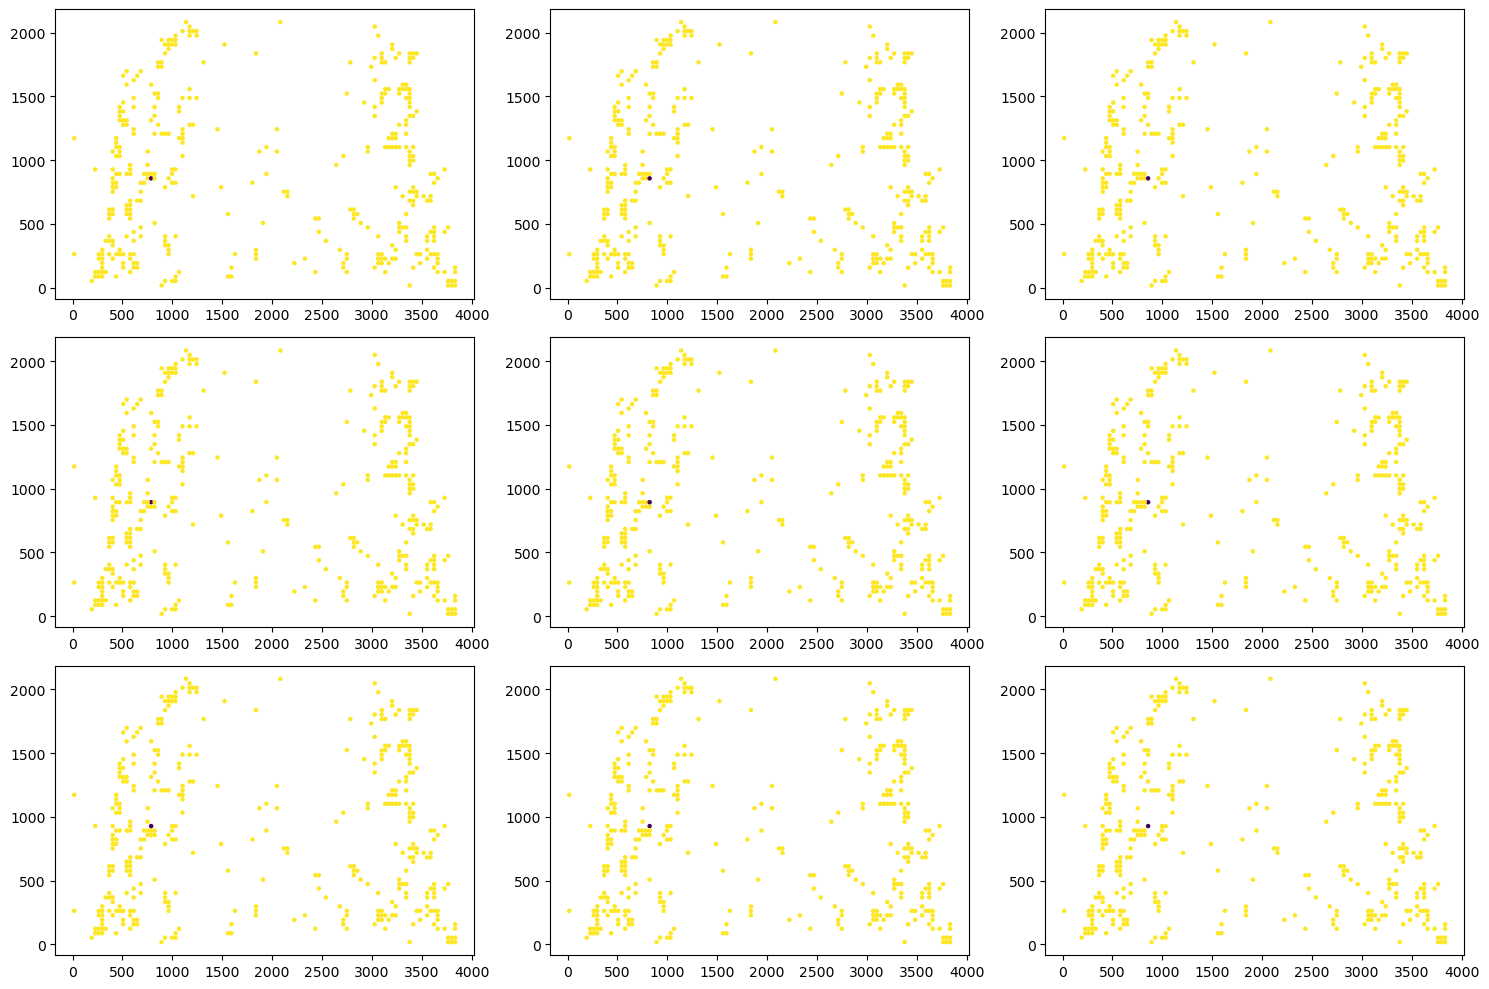

In [125]:
all_mappings = [0] * 9
all_stim_channels = [0] * 9
plt.figure(figsize = (15, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    with h5py.File(filepath + filename + str(i) + filetag, "r") as h5_file:
        stim_elecs = [int(i) for i in np.array(h5_file['assay'][f"stim_elecs_{well_no}"])[0].decode('utf-8').split(',')]
    #print((stim_elecs))


    mapping = mla.load_mapping(filepath + filename + str(i) + filetag, well_no = well_no)
    #display(mapping)
    plt.scatter(mapping.loc[:, "x"], mapping.loc[:, "y"],  s = 5, c = [mapping.loc[i, "electrode"] not in stim_elecs for i in mapping.index])

    stim_channels = [mapping.loc[mapping["electrode"] == i, "channel"].values[0] for i in stim_elecs]


    def electrode_distance(electrode1, electrode2, mapping):
        #print(electrode1)
        e1_x = mapping.loc[mapping["electrode"] == electrode1, "x"].values[0]
        e1_y = mapping.loc[mapping["electrode"] == electrode1, "y"].values[0]
        e2_x = mapping.loc[mapping["electrode"] == electrode2, "x"].values[0]
        e2_y = mapping.loc[mapping["electrode"] == electrode2, "y"].values[0]

        return np.sqrt((e2_x - e1_x)**2 + (e2_y - e1_y)**2)


    mapping["Distance from stim"] = [electrode_distance(i, stim_elecs[0], mapping) for i in mapping["electrode"]]
    mapping = mapping.sort_values("Distance from stim")
    #display(mapping)

    all_stim_channels[i] = stim_channels
    all_mappings[i] = mapping

plt.tight_layout()
plt.show()



(30, 100, 39)
257    644
6       10
18      28
48      72
40      60
38      58
30      44
282    700
208    556
77     116
20      32
265    660
122    248
32      48
69     100
62      92
204    544
16      26
241    616
303    744
4        6
328    780
112    220
0        0
93     168
105    204
5        8
26      38
61      90
2        4
44      66
51      78
42      64
326    776
166    416
110    212
243    622
247    628
336    800
Name: channel, dtype: int32
[644, 10, 28, 72, 60, 58, 44, 700, 556, 116, 32, 660, 248, 48, 100, 92, 544, 26, 616, 744, 6, 780, 220, 0, 168, 204, 8, 38, 90, 4, 66, 78, 64, 776, 416, 212, 622, 628, 800]


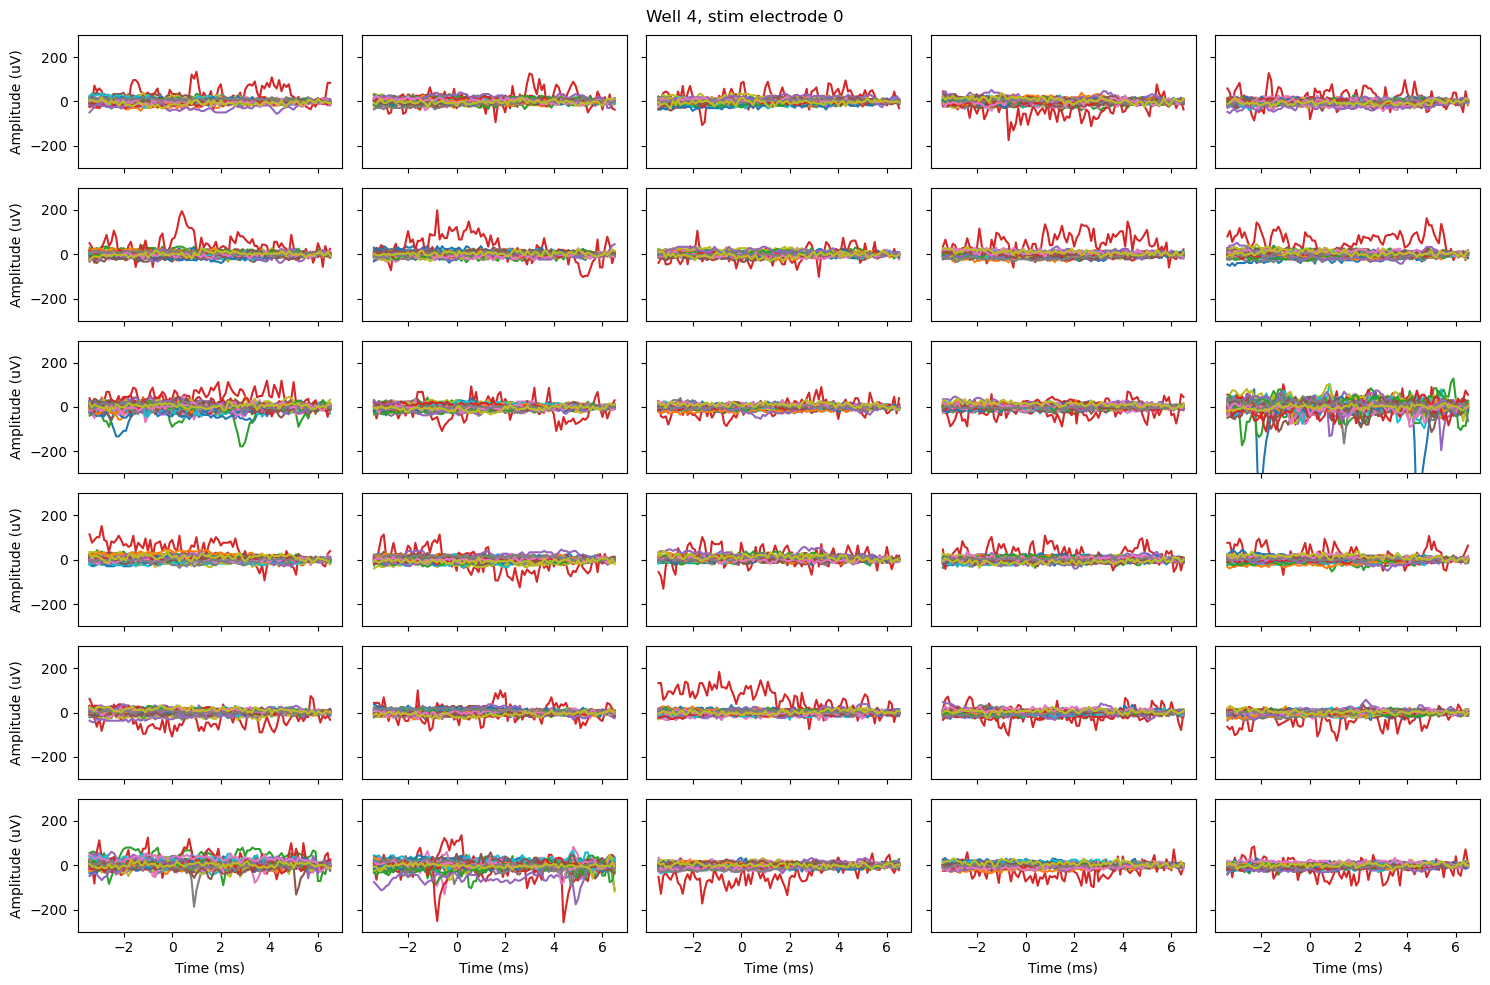

(30, 100, 39)
257    644
6       10
18      28
48      72
40      60
38      58
30      44
282    700
208    556
77     116
20      32
265    660
122    248
32      48
69     100
62      92
204    544
16      26
241    616
303    744
4        6
328    780
112    220
0        0
93     168
105    204
5        8
26      38
61      90
2        4
44      66
51      78
42      64
326    776
166    416
110    212
243    622
247    628
336    800
Name: channel, dtype: int32
[644, 10, 28, 72, 60, 58, 44, 700, 556, 116, 32, 660, 248, 48, 100, 92, 544, 26, 616, 744, 6, 780, 220, 0, 168, 204, 8, 38, 90, 4, 66, 78, 64, 776, 416, 212, 622, 628, 800]


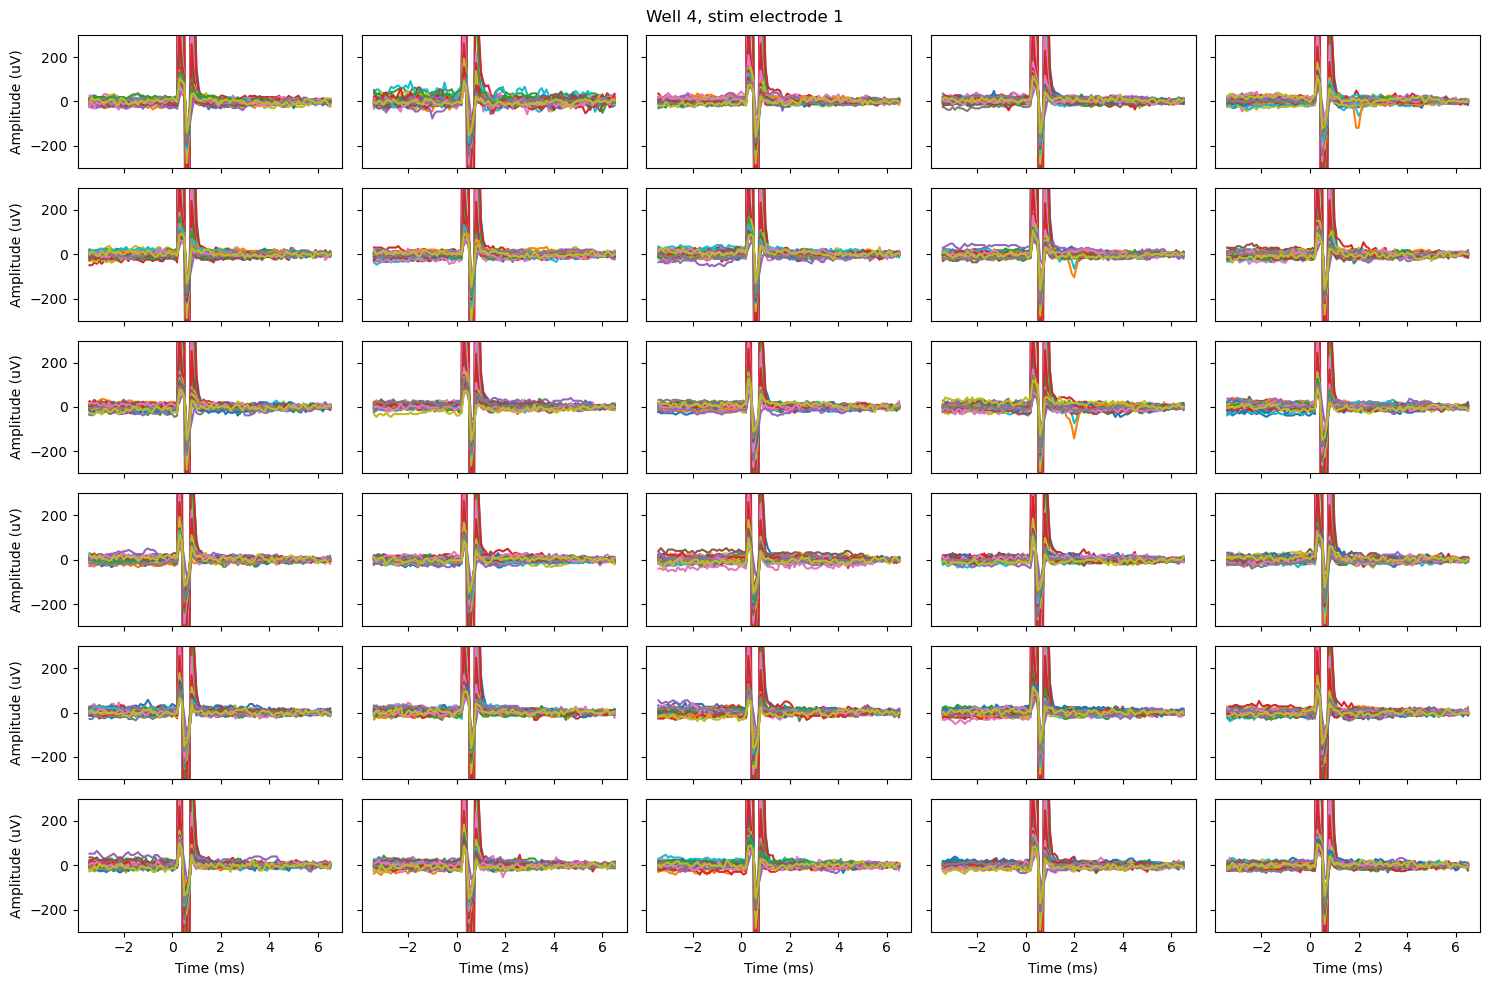

(30, 100, 39)
257    644
6       10
18      28
48      72
40      60
38      58
30      44
282    700
208    556
77     116
20      32
265    660
122    248
32      48
69     100
62      92
204    544
16      26
241    616
303    744
4        6
328    780
112    220
0        0
93     168
105    204
5        8
26      38
61      90
2        4
44      66
51      78
42      64
326    776
166    416
110    212
243    622
247    628
336    800
Name: channel, dtype: int32
[644, 10, 28, 72, 60, 58, 44, 700, 556, 116, 32, 660, 248, 48, 100, 92, 544, 26, 616, 744, 6, 780, 220, 0, 168, 204, 8, 38, 90, 4, 66, 78, 64, 776, 416, 212, 622, 628, 800]


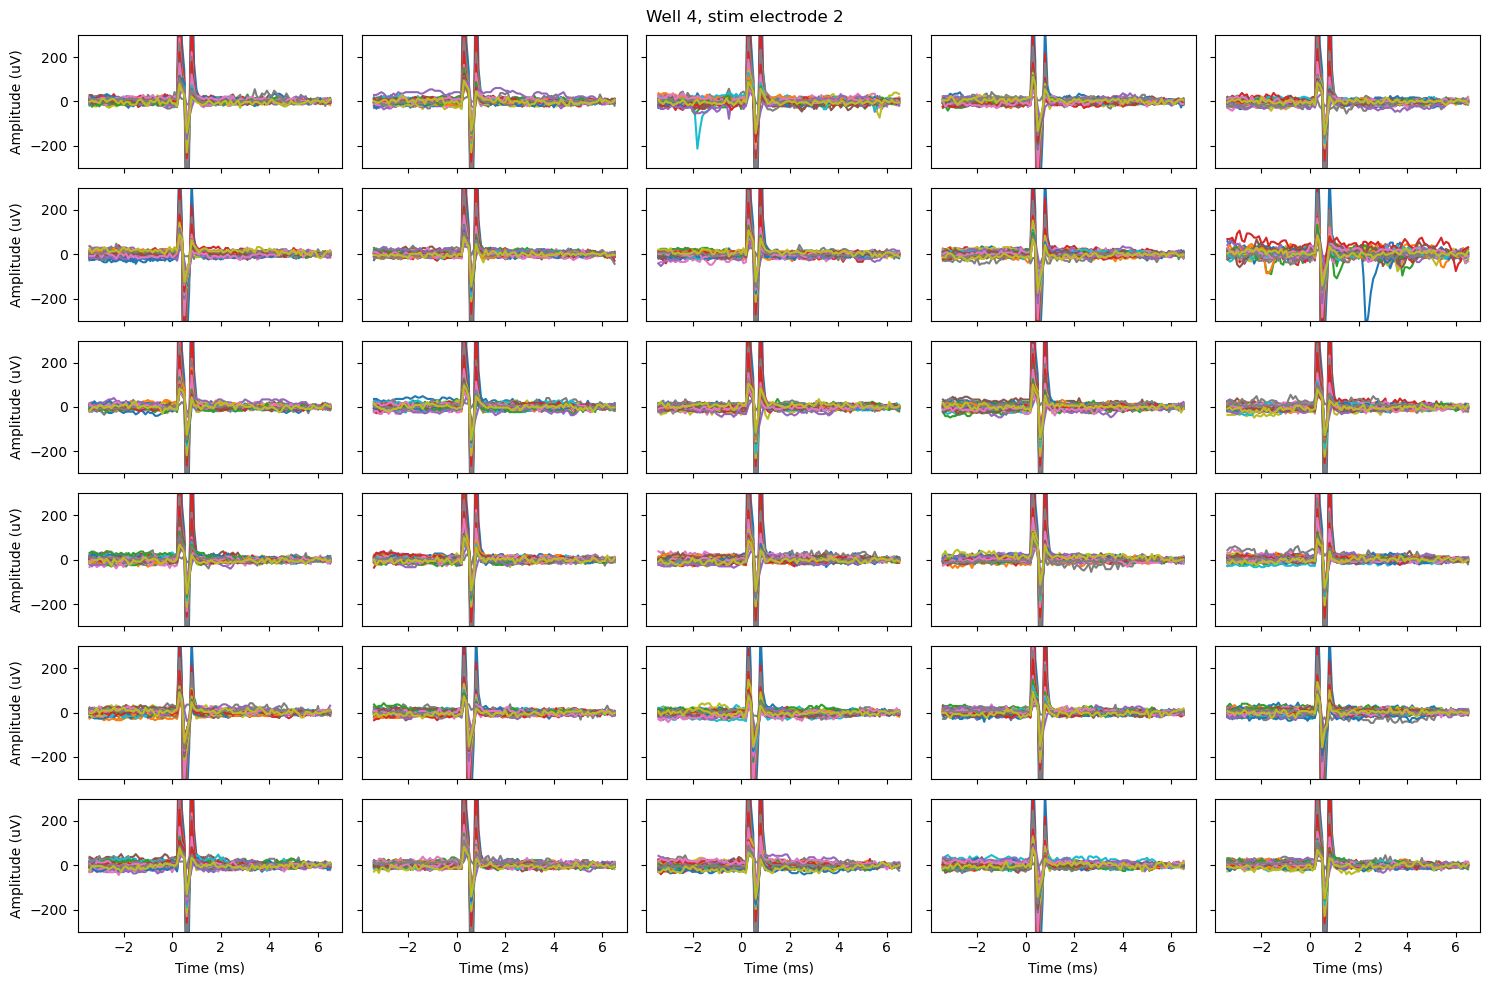

(30, 100, 39)
257    644
6       10
18      28
48      72
40      60
38      58
30      44
282    700
208    556
77     116
20      32
265    660
122    248
32      48
69     100
62      92
204    544
16      26
241    616
303    744
4        6
328    780
112    220
0        0
93     168
105    204
5        8
26      38
61      90
2        4
44      66
51      78
42      64
326    776
166    416
110    212
243    622
247    628
336    800
Name: channel, dtype: int32
[644, 10, 28, 72, 60, 58, 44, 700, 556, 116, 32, 660, 248, 48, 100, 92, 544, 26, 616, 744, 6, 780, 220, 0, 168, 204, 8, 38, 90, 4, 66, 78, 64, 776, 416, 212, 622, 628, 800]


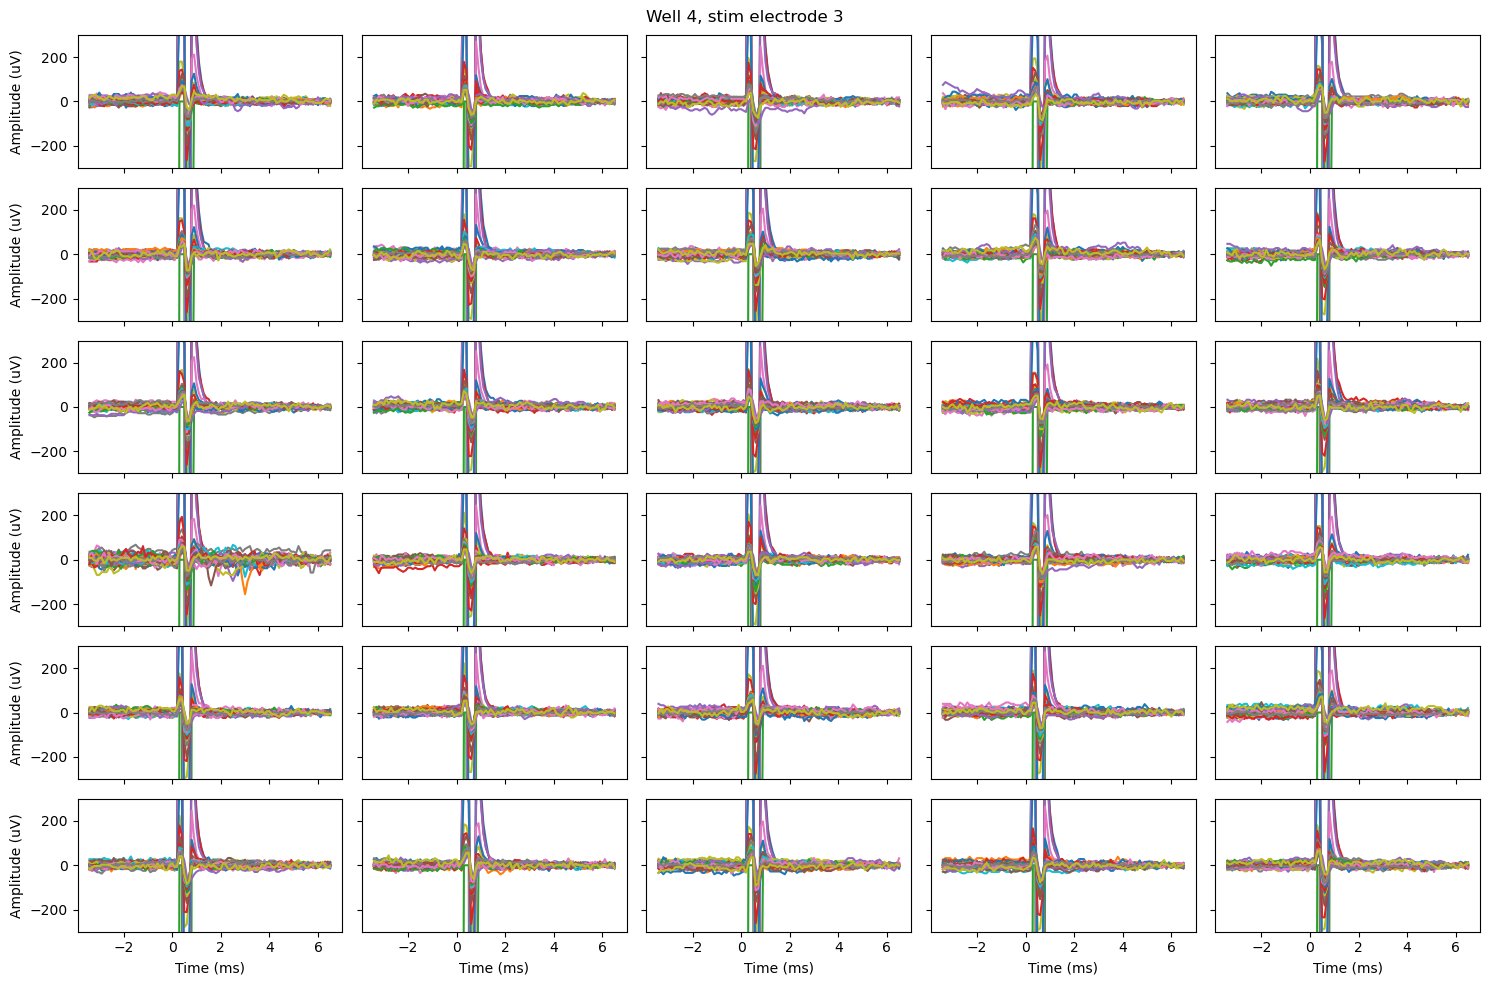

(30, 100, 39)
257    644
6       10
18      28
48      72
40      60
38      58
30      44
282    700
208    556
77     116
20      32
265    660
122    248
32      48
69     100
62      92
204    544
16      26
241    616
303    744
4        6
328    780
112    220
0        0
93     168
105    204
5        8
26      38
61      90
2        4
44      66
51      78
42      64
326    776
166    416
110    212
243    622
247    628
336    800
Name: channel, dtype: int32
[644, 10, 28, 72, 60, 58, 44, 700, 556, 116, 32, 660, 248, 48, 100, 92, 544, 26, 616, 744, 6, 780, 220, 0, 168, 204, 8, 38, 90, 4, 66, 78, 64, 776, 416, 212, 622, 628, 800]


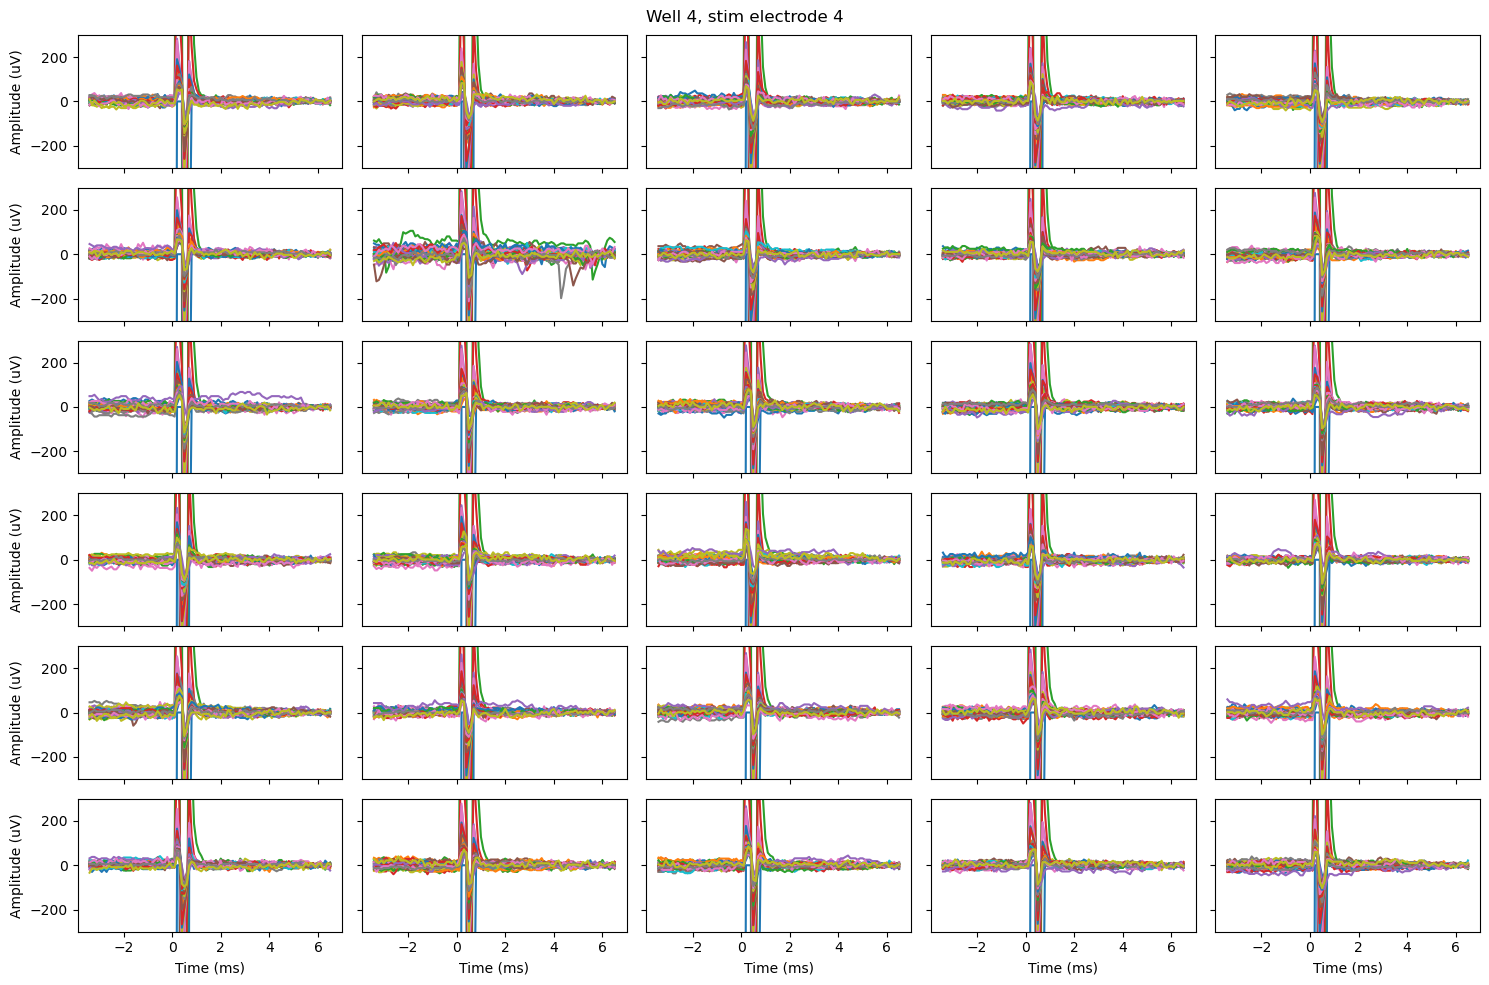

(30, 100, 39)
257    644
6       10
18      28
48      72
40      60
38      58
30      44
282    700
208    556
77     116
20      32
265    660
122    248
32      48
69     100
62      92
204    544
16      26
241    616
303    744
4        6
328    780
112    220
0        0
93     168
105    204
5        8
26      38
61      90
2        4
44      66
51      78
42      64
326    776
166    416
110    212
243    622
247    628
336    800
Name: channel, dtype: int32
[644, 10, 28, 72, 60, 58, 44, 700, 556, 116, 32, 660, 248, 48, 100, 92, 544, 26, 616, 744, 6, 780, 220, 0, 168, 204, 8, 38, 90, 4, 66, 78, 64, 776, 416, 212, 622, 628, 800]


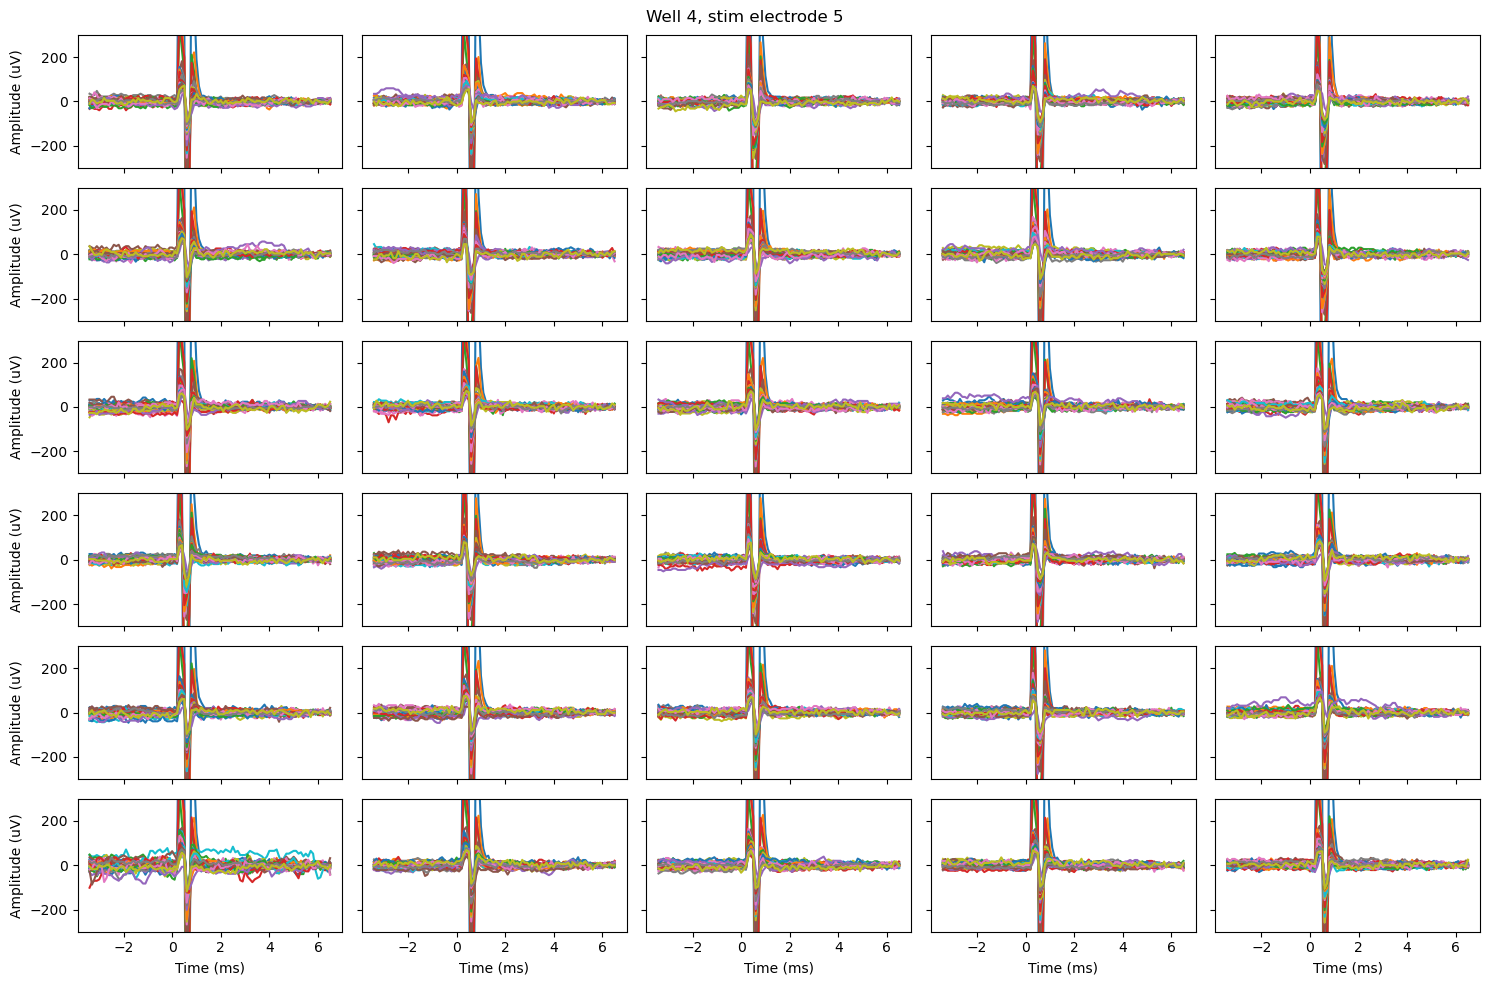

(30, 100, 39)
257    644
6       10
18      28
48      72
40      60
38      58
30      44
282    700
208    556
77     116
20      32
265    660
122    248
32      48
69     100
62      92
204    544
16      26
241    616
303    744
4        6
328    780
112    220
0        0
93     168
105    204
5        8
26      38
61      90
2        4
44      66
51      78
42      64
326    776
166    416
110    212
243    622
247    628
336    800
Name: channel, dtype: int32
[644, 10, 28, 72, 60, 58, 44, 700, 556, 116, 32, 660, 248, 48, 100, 92, 544, 26, 616, 744, 6, 780, 220, 0, 168, 204, 8, 38, 90, 4, 66, 78, 64, 776, 416, 212, 622, 628, 800]


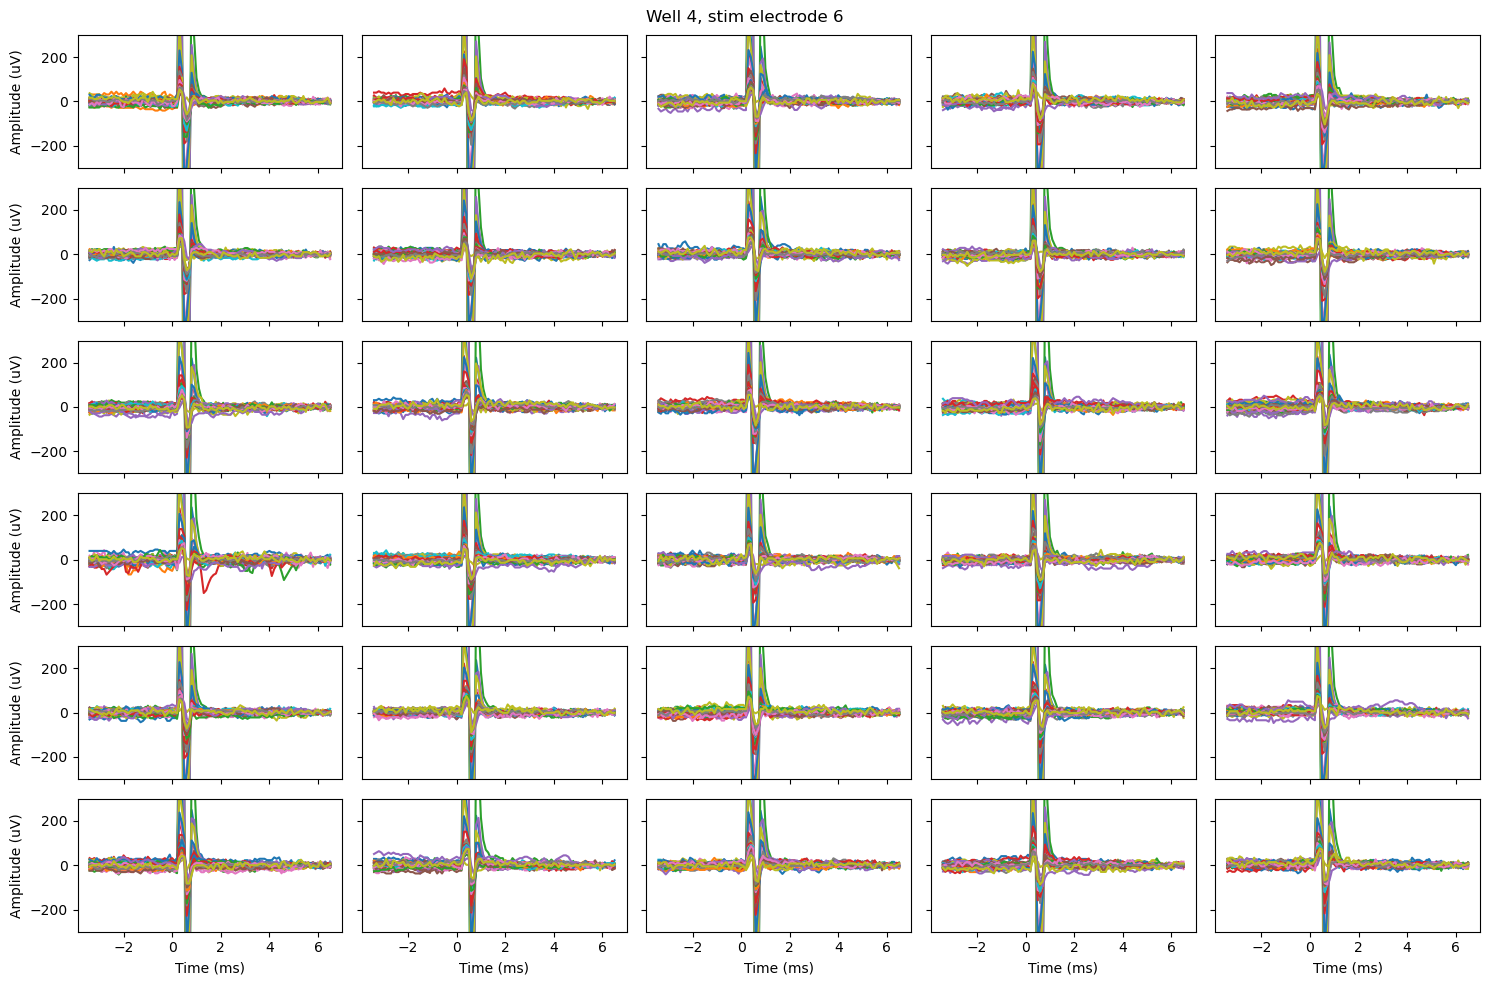

(30, 100, 39)
257    644
6       10
18      28
48      72
40      60
38      58
30      44
282    700
208    556
77     116
20      32
265    660
122    248
32      48
69     100
62      92
204    544
16      26
241    616
303    744
4        6
328    780
112    220
0        0
93     168
105    204
5        8
26      38
61      90
2        4
44      66
51      78
42      64
326    776
166    416
110    212
243    622
247    628
336    800
Name: channel, dtype: int32
[644, 10, 28, 72, 60, 58, 44, 700, 556, 116, 32, 660, 248, 48, 100, 92, 544, 26, 616, 744, 6, 780, 220, 0, 168, 204, 8, 38, 90, 4, 66, 78, 64, 776, 416, 212, 622, 628, 800]


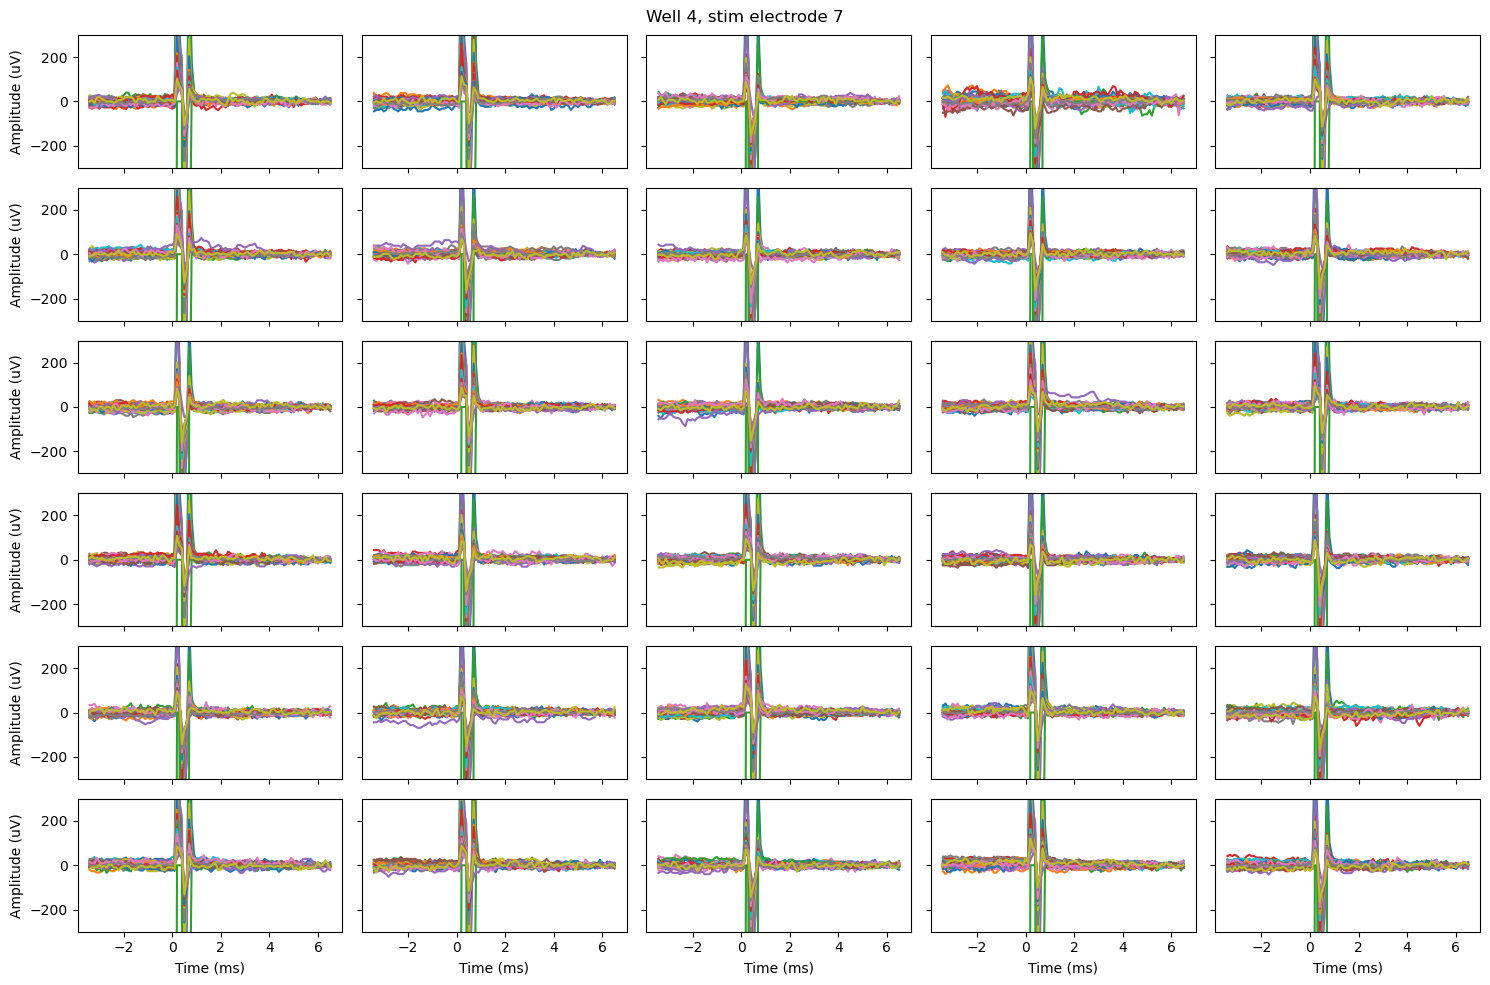

(30, 100, 39)
257    644
6       10
18      28
48      72
40      60
38      58
30      44
282    700
208    556
77     116
20      32
265    660
122    248
32      48
69     100
62      92
204    544
16      26
241    616
303    744
4        6
328    780
112    220
0        0
93     168
105    204
5        8
26      38
61      90
2        4
44      66
51      78
42      64
326    776
166    416
110    212
243    622
247    628
336    800
Name: channel, dtype: int32
[644, 10, 28, 72, 60, 58, 44, 700, 556, 116, 32, 660, 248, 48, 100, 92, 544, 26, 616, 744, 6, 780, 220, 0, 168, 204, 8, 38, 90, 4, 66, 78, 64, 776, 416, 212, 622, 628, 800]


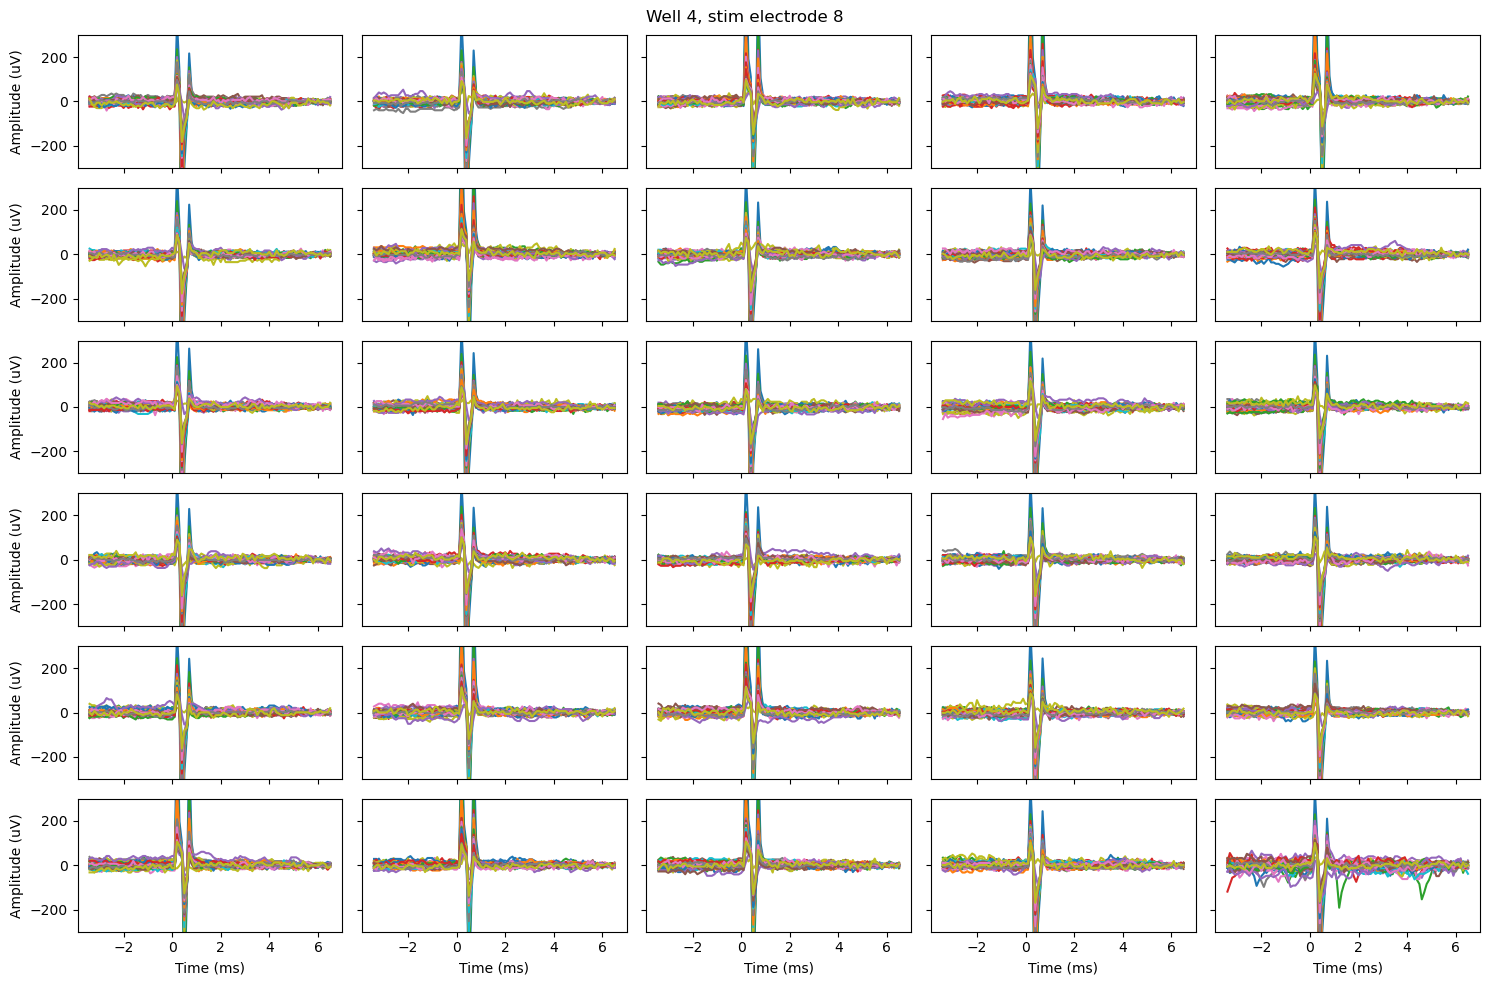

In [126]:
#get channel dict
all_all_data_arr = [0] * 9
mapping = all_mappings[5] #USE THE CENTER STIM ELECTRODE FOR THE CONFIG

closest_electrodes = mapping.loc[mapping.index[1:40], :] #EXCLUDE THE CLOSEST ELECTRODE
channel_nums = closest_electrodes["channel"]

for i in range(9):
    trimmed_events = all_trimmed_events[i]


    frames = 100
    #channel_nums = mapping.loc[mapping.index[1:20], "channel"] #EXCLUDE THE CLOSEST ELECTRODE

    all_data_arr = np.zeros((30, frames, len(channel_nums)))
    print(all_data_arr.shape)
    _, _, channels = mla.load_from_file_by_frames(filepath + filename + str(i) + filetag, 0, 1, well_no = well_no)
    channel_num_to_index_dict = dict()

    print(channel_nums)
    channel_indices = [list(channels).index(i) for i in channel_nums]
    print(channel_indices)

    #plt.figure(figsize = (15, 10))
    fig, ax = plt.subplots(6, 5, sharex = 'all', sharey = 'all', figsize = (15, 10))

    fig.suptitle(f"Well {well_no}, stim electrode {i}")

    for j, channel in enumerate(channels):
        channel_num_to_index_dict[channel] = j
    
    for j in trimmed_events.index:

        row = j // 5
        col = j % 5
        plt.sca(ax[row, col])

        time = trimmed_events.loc[j, "time"]
        
        arr, times, channels = mla.load_from_file_by_frames(filepath + filename + str(i) + filetag, int(time * 10000 - frames/3), frames, well_no = well_no)
        channel_traces = arr[:, channel_indices]

        mean_arr = (np.repeat(np.mean(arr[-10:-1,channel_indices, np.newaxis], 0), np.shape(channel_traces)[0], axis = 1).T)
        #plt.plot(channels)
        #plt.subplot(6, 5, j + 1)
        plt.plot(times * 1000  - (time * 1000), (channel_traces - mean_arr) * 1000000)
        if row == 5:
            plt.xlabel("Time (ms)")
        if col == 0:
            plt.ylabel("Amplitude (uV)")

        plt.ylim([-300, 300])

        all_data_arr[j, :, :] = channel_traces - mean_arr

    plt.tight_layout()
    plt.show()
            

    all_data_arr

    all_all_data_arr[i] = all_data_arr



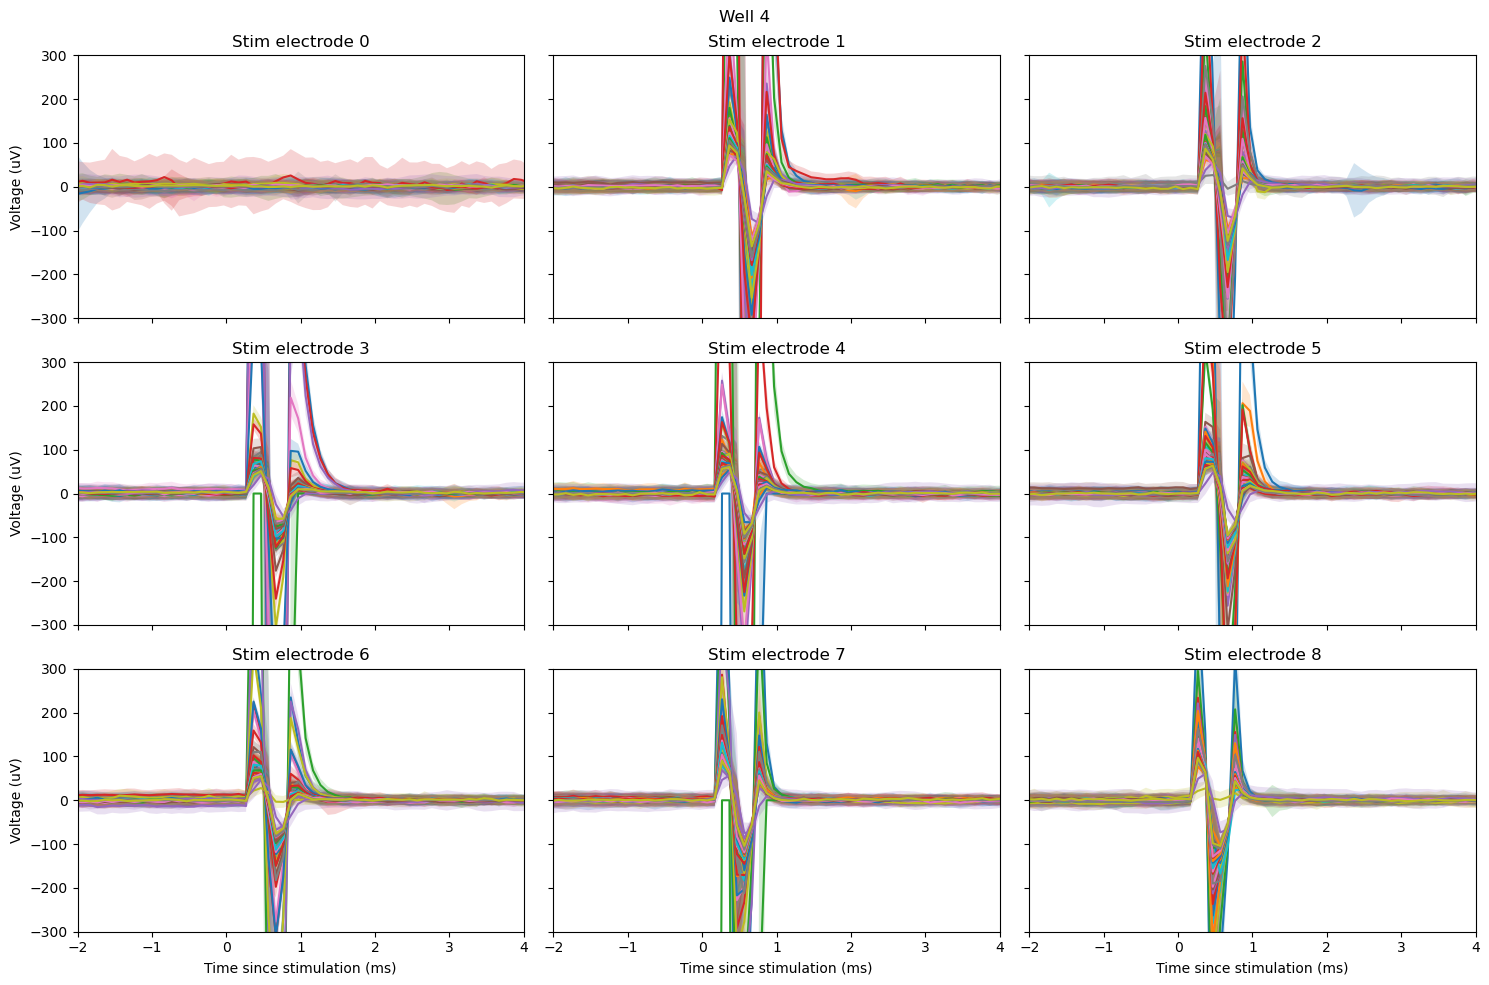

In [127]:
fig, ax = plt.subplots(3, 3, sharex = 'all', sharey = 'all', figsize = (15, 10))

fig.suptitle(f"Well {well_no}")

offset = False
for i in range(9):

    row = i //3
    col = i % 3

    plt.sca(ax[row, col])
    plt.title(f"Stim electrode {i}")


    all_data_arr = all_all_data_arr[i]
    mean = all_data_arr.mean(axis = 0)*1000000
    stdev = all_data_arr.std(axis = 0)*1000000

    
    for j in range(np.shape(mean)[1]):
        if offset:
            offset_value = 100 * j 
        else:
            offset_value = 0
        plt.plot((times - times[0]) * 1000  - (frames/3 /10), mean[:, j] + offset_value, label = f"electrode {list(closest_electrodes['electrode'])[j]}")
        plt.fill_between((times - times[0]) * 1000 - (frames/3 /10), mean[:, j] + offset_value+ stdev[:, j], mean[:, j] + offset_value - stdev[:, j], label = f"electrode {list(closest_electrodes['electrode'])[j]}", alpha = 0.2)

    if col == 0:
        plt.ylabel("Voltage (uV)")

    if row ==2:
        plt.xlabel("Time since stimulation (ms)")
    
    plt.xlim(-2, 4)
    plt.ylim(-300, 300 + offset_value)

    #plt.legend()



plt.tight_layout()
plt.show()